# Exploratory Data Analysis (EDA)

Here we explore the data and analyze trends.

# Library import

In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import calendar
import geopandas as gpd
from adjustText import adjust_text  # Import adjust_text

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Data import

In [2]:
# Load data
price = pd.read_csv("../data/train_imputed.csv")

In [3]:
# Check if the import worked
# Set the maximum number of columns to display
pd.set_option('display.max_columns', None)
price.head()

,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,price_per_sqft,hdb_age,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,Latitude,Longitude,planning_area,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
0,88471,2016-05,KALLANG/WHAMPOA,4 ROOM,3B,UPP BOON KENG RD,10 TO 12,90.0,Model A,2006,680000.0,2016,5,11,10,12,11,4 ROOM Model A,"3B, UPP BOON KENG RD",968.760,701.928238,15,25,2005,Y,N,N,N,N,142,0,0,0,96,46,0,0,0,0,0,0,0,382003,1.314299,103.872828,Kallang,1094.090418,NaN,1.0,7.0,154.753357,1.0,3.0,13.0,84,60,330.083069,Kallang,0,0,1.311540,103.871731,29.427395,Blk 3B,1.314433,103.872600,1138.633422,Geylang Methodist School,78,1,1.317659,103.882504,1138.633422,Geylang Methodist School,224,0,1.317659,103.882504
1,122598,2012-07,BISHAN,5 ROOM,153,BISHAN ST 13,07 TO 09,130.0,Improved,1987,665000.0,2012,7,8,7,9,8,5 ROOM Improved,"153, BISHAN ST 13",1399.320,475.230826,34,9,1987,Y,N,N,N,N,112,0,0,0,56,56,0,0,0,0,0,0,0,570153,1.346086,103.855078,Bishan,866.941448,NaN,1.0,3.0,640.151925,NaN,1.0,7.0,80,77,903.659703,Bishan,1,1,1.350580,103.848305,58.207761,BLK 151A MKT,1.345659,103.855381,415.607357,Kuo Chuan Presbyterian Primary School,45,1,1.349783,103.854529,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892
2,170897,2013-07,BUKIT BATOK,EXECUTIVE,289B,BT BATOK ST 25,13 TO 15,144.0,Apartment,1997,838000.0,2013,7,14,13,15,14,EXECUTIVE Apartment,"289B, BT BATOK ST 25",1550.016,540.639580,24,16,1996,Y,N,N,N,N,90,0,0,0,0,30,60,0,0,0,0,0,0,651289,1.343867,103.760535,Bukit Batok,1459.579948,NaN,1.0,4.0,1762.082341,NaN,2.0,1.0,84,95,1334.251197,Bukit Batok,1,0,1.349561,103.749970,214.747860,Blk 289E,1.344064,103.758613,498.849039,Keming Primary School,39,0,1.345245,103.756265,180.074558,Yusof Ishak Secondary School,188,0,1.342334,103.760013
3,86070,2012-04,BISHAN,4 ROOM,232,BISHAN ST 22,01 TO 05,103.0,Model A,1992,550000.0,2012,4,3,1,5,3,4 ROOM Model A,"232, BISHAN ST 22",1108.692,496.080066,29,11,1990,Y,Y,N,N,N,75,0,0,0,68,7,0,0,0,0,0,0,0,570232,1.358245,103.845504,Bishan,950.175199,NaN,1.0,4.0,726.215262,NaN,1.0,9.0,32,86,907.453484,Bishan,1,1,1.350580,103.848305,43.396521,Opp Bishan Nth Shop Mall,1.358045,103.845169,389.515528,Catholic High School,20,1,1.354789,103.844934,389.515528,Catholic High School,253,1,1.354789,103.844934
4,153632,2017-12,YISHUN,4 ROOM,876,YISHUN ST 81,01 TO 03,83.0,Simplified,1987,298000.0,2017,12,2,1,3,2,4 ROOM Simplified,"876, YISHUN ST 81",893.412,333.552717,34,4,1987,Y,N,N,N,N,48,0,0,0,30,18,0,0,0,0,0,0,0,760876,1.414745,103.835532,Yishun,729.771895,NaN,1.0,2.0,1540.151439,NaN,5.0,1.0,45,0,412.343032,Khatib,0,0,1.417131,103.832692,129.422752,Blk 873,1.415424,103.836477,401.200584,Naval Base Primary School,74,0,1.416280,103.838798,312.025435,Orchid Park Secondary School,208,0,1.414888,103.838335


# Summary Statistics

In [4]:
price.describe()

,id,floor_area_sqm,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,mid_storey,lower,upper,mid,floor_area_sqft,price_per_sqft,hdb_age,max_floor_lvl,year_completed,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,Latitude,Longitude,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
count,150634.000000,150634.00000,150634.000000,1.506340e+05,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,57845.000000,150634.000000,148694.000000,150634.000000,53244.000000,150634.000000,121432.000000,150634.00000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000
mean,93047.887496,97.19763,1992.448464,4.491615e+05,2016.489551,6.580500,8.284823,7.248370,9.321275,8.284823,1046.235290,434.130280,28.551536,15.139816,1990.922906,124.683312,0.138813,1.782055,39.219366,50.083978,26.299853,5.940770,0.023972,0.448564,0.063678,0.622516,0.059409,0.000339,1.366224,103.839391,664.467434,1.269237,1.961934,5.236486,1173.700148,1.382672,2.299048,4.704122,48.65298,58.138322,765.007872,0.546364,0.264024,1.365667,103.839400,115.258966,1.366231,103.839369,395.172974,55.368190,0.113195,1.366268,103.839106,508.533220,210.146428,0.031879,1.365986,103.839340
std,53679.906247,24.40304,12.138829,1.433076e+05,2.752396,3.345468,5.508074,5.515155,5.507364,5.508074,262.674321,104.797180,12.138829,6.232492,12.202185,58.349670,5.947970,11.713826,68.748273,45.302101,33.456575,19.131872,1.135483,5.350617,2.028341,11.193820,0.669842,0.024305,0.042850,0.072506,367.920575,0.624275,1.248701,3.453332,1076.701337,0.652205,1.622559,3.955697,19.13878,55.495519,429.366039,0.497847,0.440814,0.042563,0.072582,55.572855,0.042865,0.072520,234.760931,17.903918,0.316832,0.042669,0.072637,309.066265,20.010489,0.175677,0.042599,0.072630
min,1.000000,31.00000,1966.000000,1.500000e+05,2012.000000,1.000000,2.000000,1.000000,3.000000,2.000000,333.684000,205.108901,2.000000,2.000000,1949.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.270380,103.685228,0.000000,1.000000,1.000000,1.000000,1.873295,1.000000,1.000000,1.000000,0.00000,0.000000,21.971410,0.000000,0.000000,1.265982,103.697143,9.001285,1.270759,103.684206,45.668324,20.000000,0.000000,1.274962,103.687724,38.913475,188.000000,0.000000,1.276029,103.687207
25%,46469.250000,75.00000,1984.000000,3.470000e+05,2014.000000,4.000000,5.000000,4.000000,6.000000,5.000000,807.300000,364.973191,20.000000,12.000000,1983.000000,90.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.336285,103.774859,392.189093,1.000000,1.000000,3.000000,372.132398,1.000000,1.000000,1.000000,40.00000,0.000000,458.266301,0.000000,0.000000,1.336358,103.773982,75.032491,1.336405,103.774414,227.083163,44.000000,0.000000,1.337289,103.773754,290.285883,188.000000,0.000000,1.337545,103.776008
50%,93077.500000,95.00000,1992.000000,

## Which year had the most number of transactions? (Min, max, mean)

In [5]:
# Which year had the most amount of resale flats being sold? 
# Group the data by year and count the number of resale flats sold in each year
yearly_counts = price['Tranc_Year'].value_counts()

# Find the year with the highest count, lowest count and average count
most_sold_year = yearly_counts.idxmax()
least_sold_year = yearly_counts.idxmin()
average_sold_year = yearly_counts.mean()

# Print the result
print(f"The year with the most resale flats sold is {most_sold_year} with {yearly_counts[most_sold_year]} flats sold.")
print(f"The year with the least resale flats sold is {least_sold_year} with {yearly_counts[least_sold_year]} flats sold.")
print(f"The average number of resale flats sold per year is {average_sold_year:.0f}")

The year with the most resale flats sold is 2020 with 18904 flats sold.
The year with the least resale flats sold is 2021 with 7316 flats sold.
The average number of resale flats sold per year is 15063


## Which month had the most number of transactions? (Min, max, mean)

In [6]:
# Which month had the most amount of resale flats being sold? 
# Group the data by month and count the number of resale flats sold in each month
monthly_counts = price['Tranc_Month'].value_counts()

# Find the year with the highest count, lowest count and average count
most_sold_month = monthly_counts.idxmax()
least_sold_month = monthly_counts.idxmin()
average_sold_month = monthly_counts.mean()

# Print the result
print(f"The month with the most resale flats sold is {calendar.month_name[most_sold_month]} with {monthly_counts[most_sold_month]} flats sold.")
print(f"The month with the least resale flats sold is {calendar.month_name[least_sold_month]} with {monthly_counts[least_sold_month]} flats sold.")
print(f"The average number of resale flats sold per month is {average_sold_month:.2f}")

The month with the most resale flats sold is March with 14524 flats sold.
The month with the least resale flats sold is February with 9403 flats sold.
The average number of resale flats sold per month is 12552.83


## Most expensive and cheapest town

In [186]:
# Which town has the highest and lowest average resale price? 
# Group the DataFrame by the "town" column and calculate the mean resale price
mean_resale_prices_by_town = price.groupby('town')['resale_price'].mean()

# Sort the Series by resale price in ascending order
mean_resale_prices_by_town.sort_values()

# Print the resulting Series
# Print the resulting Series
print(f"There are {len(mean_resale_prices_by_town)} towns.")
print(f"The most expensive town to buy a resale flat in is {mean_resale_prices_by_town.idxmax()} with an average price of ${mean_resale_prices_by_town.max():.0f}.")
print(f"The most expensive town to buy a resale flat in is {mean_resale_prices_by_town.idxmin()} with an average price of ${mean_resale_prices_by_town.min():.0f}.")

# Print the sorted Series
print(mean_resale_prices_by_town)

There are 26 towns.
The most expensive town to buy a resale flat in is BUKIT TIMAH with an average price of $704417.
The most expensive town to buy a resale flat in is YISHUN with an average price of $375554.
town
ANG MO KIO         414215.073827
BEDOK              419066.233031
BISHAN             618369.865510
BUKIT BATOK        397435.616708
BUKIT MERAH        555343.708384
BUKIT PANJANG      436084.447042
BUKIT TIMAH        704416.883469
CENTRAL AREA       604929.860689
CHOA CHU KANG      413041.806363
CLEMENTI           466308.240573
GEYLANG            429782.144506
HOUGANG            441792.373347
JURONG EAST        425715.546233
JURONG WEST        412280.968017
KALLANG/WHAMPOA    489461.074783
MARINE PARADE      528395.655892
PASIR RIS          501179.530758
PUNGGOL            469218.233866
QUEENSTOWN         550974.147661
SEMBAWANG          412356.399914
SENGKANG           458109.147497
SERANGOON          487916.848543
TAMPINES           474169.612888
TOA PAYOH          475738.8

## Most expensive, cheapest and average resale flat price

In [8]:
# Which transaction has the lowest, highest and average price
# Find the index of the minimum, maximum resale price
max_resale_price_index = price['resale_price'].idxmax()
min_resale_price_index = price['resale_price'].idxmin()
avg_resale_price = price['resale_price'].mean()

# Extract data associated with the maximum resale price
max_resale_price_data = price.loc[max_resale_price_index]
min_resale_price_data = price.loc[min_resale_price_index]

# Print the results
print(f"The most expensive resale flat cost ${max_resale_price_data['resale_price']:.0f}. The flat is in the {max_resale_price_data['town']} and is a {max_resale_price_data['flat_type']} flat with {max_resale_price_data['floor_area_sqft']:.2f} square feet and is on the {max_resale_price_data['mid']} floor.")
print(f"The cheapest resale flat cost ${min_resale_price_data['resale_price']:.0f}. The flat is in the {min_resale_price_data['town']} and is a {min_resale_price_data['flat_type']} flat with {min_resale_price_data['floor_area_sqft']:.2f} square feet and is on the {min_resale_price_data['mid']} floor.")
print(f"The average resale price of a flat is ${avg_resale_price:.0f}.")

The most expensive resale flat cost $1258000. The flat is in the CENTRAL AREA and is a 5 ROOM flat with 1151.75 square feet and is on the 44 floor.
The cheapest resale flat cost $150000. The flat is in the GEYLANG and is a 2 ROOM flat with 484.38 square feet and is on the 5 floor.
The average resale price of a flat is $449162.


# Visualizations

## Are more flats being sold with every passing year?

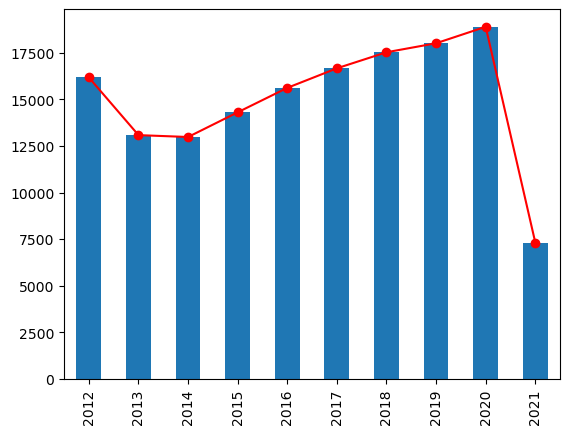

In [9]:
# Sort the Series by the year (index) from lowest to highest
yearly_counts_sorted = yearly_counts.sort_index()
# print(yearly_counts_sorted)

# Plot the bar chart
yearly_counts_sorted.plot(kind='bar')

# Create a line plot with markers
x = np.arange(len(yearly_counts_sorted))  # Create x values for the line plot
y = yearly_counts_sorted.values           # Get the values for the bar chart

# Plot the line connecting data points
plt.plot(x, y, marker='o', linestyle='-', color='red', label='Data Points')

# Set the x-axis labels to be the sorted years
plt.xticks(x, yearly_counts_sorted.index)

# Show the plot
plt.show()

We found that something was off with the yearly trends. The number of resale flats sold in the year of 2021 was very low. So we decided to check if we had all the data from that year. By checking if we had all the months in the year, we realized that the year 2012 and 2021 did not have the complete data set for the year. Therefore to have a better view of the yearly trend, we dropped those years and plot the graph again. 

In [11]:
# Group the DataFrame by year and month and count the number of resale flats sold
monthly_counts = price.groupby(['Tranc_Year', 'Tranc_Month']).size().reset_index(name='count')

pd.set_option('display.max_rows', None)

# Print the resulting DataFrame
print(monthly_counts)

     Tranc_Year  Tranc_Month  count
0          2012            3   1906
1          2012            4   1712
2          2012            5   1873
3          2012            6   1621
4          2012            7   1776
5          2012            8   1678
6          2012            9   1451
7          2012           10   1554
8          2012           11   1411
9          2012           12   1198
10         2013            1   1339
11         2013            2    714
12         2013            3   1082
13         2013            4   1369
14         2013            5   1262
15         2013            6   1066
16         2013            7   1192
17         2013            8   1136
18         2013            9    998
19         2013           10   1112
20         2013           11    997
21         2013           12    818
22         2014            1    891
23         2014            2    782
24         2014            3   1145
25         2014            4   1262
26         2014            5

We noticed that the data collected for years 2012 and 2021 were not complete. So we will drop those years to have a fair analysis over the years.

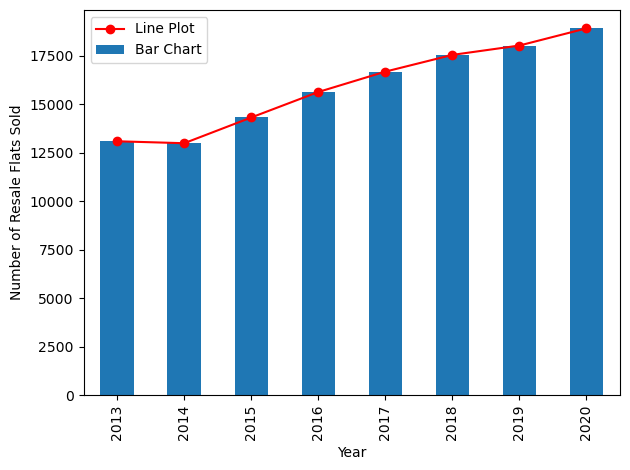

In [10]:
# Drop the years 2012 and 2021
filtered_yearly_counts = yearly_counts_sorted.loc[(yearly_counts_sorted.index != 2012) & (yearly_counts_sorted.index != 2021)]

# Yearly trend - Create a bar plot
filtered_yearly_counts.plot(kind='bar', label='Bar Chart')

# Sort the Series by the year (index) from lowest to highest
filtered_yearly_counts = filtered_yearly_counts.sort_index()

# Create a line plot with markers
x = np.arange(len(filtered_yearly_counts))  # Create x values for the line plot
y = filtered_yearly_counts.values           # Get the values for the bar chart

# Plot the line connecting data points
plt.plot(x, y, marker='o', linestyle='-', color='red', label='Line Plot')

# Set the x-axis labels to be the sorted years
plt.xticks(x, filtered_yearly_counts.index)

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Number of Resale Flats Sold')
plt.legend()

# Save or display the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.savefig('HDB_resale_flats_yearly_trend.png', transparent=True)
plt.show()

There is an upward yearly trend. There are more flats being sold in the more recent years.

## Are flats getting more expensive as the years go by?

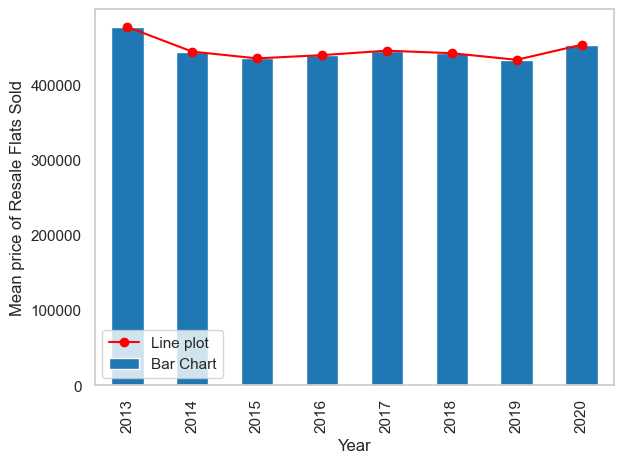

In [171]:
# Group the transactions by year and calculate the average resale price
yearly_mean_price = price.groupby('Tranc_Year')['resale_price'].mean()

# Display the resulting DataFrame
# print(yearly_mean_price)

# Drop the years 2012 and 2021
filtered_yearly_mean_price = yearly_mean_price.loc[(yearly_counts_sorted.index != 2012) & (yearly_counts_sorted.index != 2021)]

# Plot the bar chart
filtered_yearly_mean_price.plot(kind='bar', color='#1f77b4', label='Bar Chart')

# Create a line plot with markers
x = np.arange(len(filtered_yearly_mean_price))  # Create x values for the line plot
y = filtered_yearly_mean_price.values           # Get the values for the bar chart

# Plot the line connecting data points
plt.plot(x, y, marker='o', linestyle='-', color='red', label='Line plot')

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Mean price of Resale Flats Sold')
plt.legend()

# Get rid of the grid
plt.grid(False)

# Set the x-axis labels to be the sorted years
plt.xticks(x, filtered_yearly_mean_price.index)

# Show the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

There does not seem to be a trend and the average price for each year is about the same.

## Do more flats get sold in a particular month?

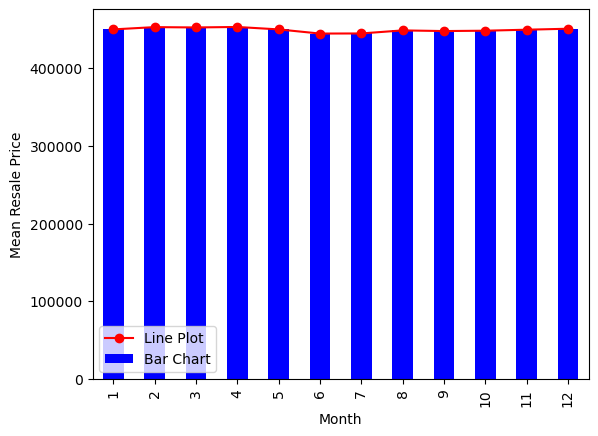

In [12]:
# Group the DataFrame by month and calculate the mean resale price for each month
month_grouped = price.groupby('Tranc_Month')['resale_price'].mean()
# print(month_grouped)

# Create a list of month names for sorting
# month_names = {'1':'January', '2':'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Sort the Series by month names
# mean_resale_prices_by_month_sorted = month_grouped.reindex(month_names)
# print(mean_resale_prices_by_month_sorted)

# Plot the bar chart
month_grouped.plot(kind='bar', color='blue', label='Bar Chart')

# Create a line plot with markers
x = np.arange(len(month_grouped))  # Create x values for the line plot
y = month_grouped.values           # Get the values for the bar chart

# Plot the line connecting data points
plt.plot(x, y, marker='o', linestyle='-', color='red', label='Line Plot')

# Set the x-axis labels to be the sorted month names
plt.xticks(x, month_grouped.index)

# Add labels and legend
plt.xlabel('Month')
plt.ylabel('Mean Resale Price')
plt.legend()

# Show the plot
plt.show()

There is not much of a difference between the months for the number of resale flats.

## Which flat type is more expensive?

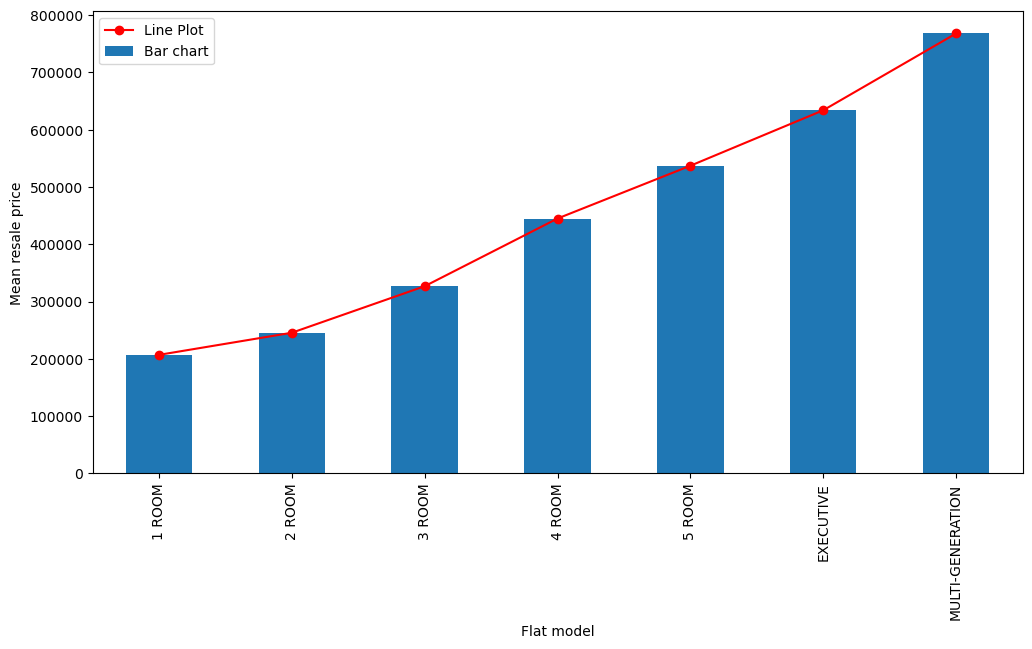

In [13]:
# What is the price difference between different flat models?
# Group the DataFrame by 'flat_model' and calculate the mean 'resale_price' within each group
resale_price_by_flat_type = price.groupby('flat_type')['resale_price'].mean()

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the bar chart 
resale_price_by_flat_type.plot(kind='bar', label='Bar chart' )

# Create a line plot with markers
x = np.arange(len(resale_price_by_flat_type))  # Create x values for the line plot
y = resale_price_by_flat_type.values           # Get the values for the bar chart

# Plot the line connecting data points
plt.plot(x, y, marker='o', linestyle='-', color='red', label='Line Plot')

# Add the x and y axis labels
plt.xlabel('Flat model')
plt.ylabel('Mean resale price')
plt.legend()

# Show plot
plt.show()

The bigger the flat is, the more expensive it gets.

## Are flats on higher levels more expensive?

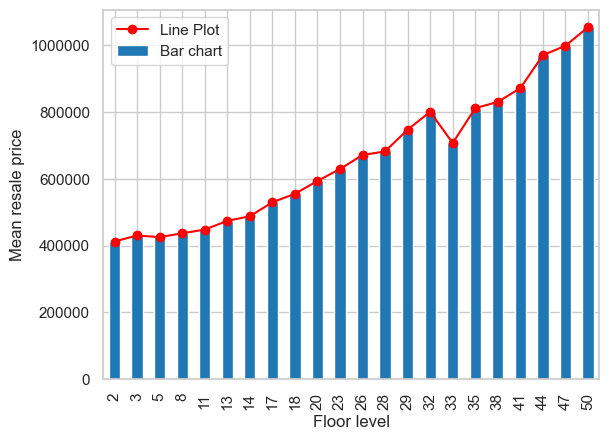

In [176]:
# Find out if you stay on higher floors, the flat cost more.
# Group the DataFrame by 'storey_range' and calculate the mean resale price, rounding to the nearest integer
floor_grouped = price.groupby('mid')['resale_price'].mean().apply(lambda x: round(x))

# Print the results
# print(floor_grouped)

# Plot the bar chart 
floor_grouped.plot(kind='bar', color='#1f77b4', label='Bar chart' )

# Create a line plot with markers
x = np.arange(len(floor_grouped))  # Create x values for the line plot
y = floor_grouped.values           # Get the values for the bar chart

# Plot the line connecting data points
plt.plot(x, y, marker='o', linestyle='-', color='red', label='Line Plot')

# Set y-axis labels to non-scientific notation
plt.ticklabel_format(style='plain', axis='y')

# Add the x and y axis labels
plt.xlabel('Floor level')
plt.ylabel('Mean resale price')
plt.legend()

# Show plot
plt.show()

From the plot, we can see that the higher the floor level, the more expensive the flat is.

## Do higher floor flats have more area (square feet)?

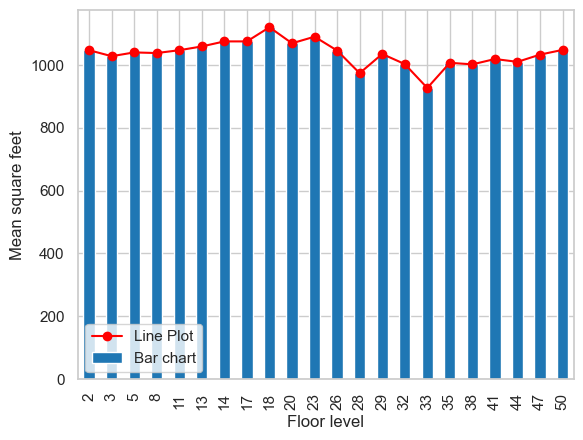

In [174]:
# Group the DataFrame by 'storey_range' and calculate the mean resale price, rounding to the nearest integer
floor_area_grouped = price.groupby('mid')['floor_area_sqft'].mean().apply(lambda x: round(x))

# Print the results
# print(floor_grouped)

# Plot the bar chart 
floor_area_grouped.plot(kind='bar', color='#1f77b4', label='Bar chart' )

# Create a line plot with markers
x = np.arange(len(floor_area_grouped))  # Create x values for the line plot
y = floor_area_grouped.values           # Get the values for the bar chart

# Plot the line connecting data points
plt.plot(x, y, marker='o', linestyle='-', color='red', label='Line Plot')

# Set y-axis labels to non-scientific notation
plt.ticklabel_format(style='plain', axis='y')

# Add the x and y axis labels
plt.xlabel('Floor level')
plt.ylabel('Mean square feet')
plt.legend()


# Show plot
plt.show()

It seems like all the floors are about the same and have a mean square feet of about 1000.

## Are older HDB flats cheaper?

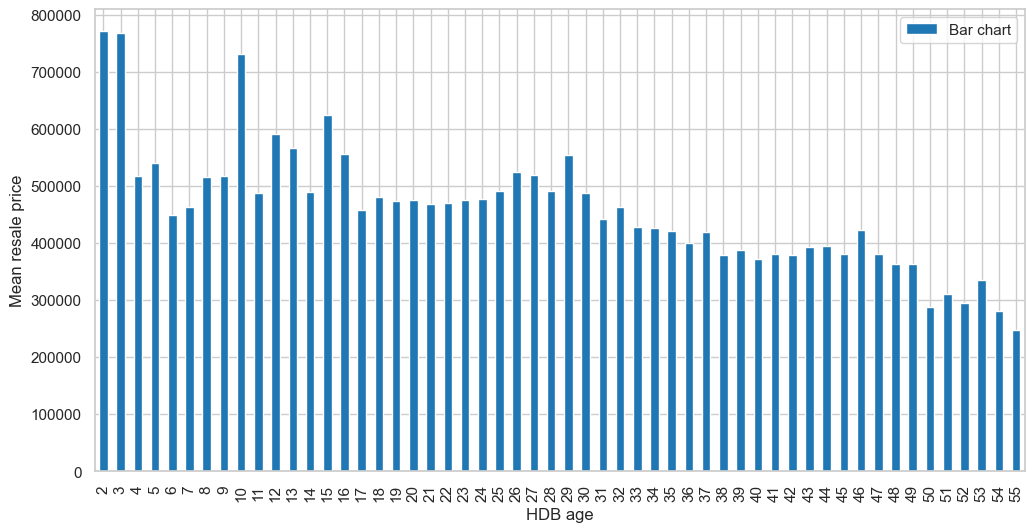

In [189]:
# Find out how much profit they earn from selling the flat at the 5/10/15 year mark. 
# Would it cost more if the HDB is new or old? 
# Group the DataFrame by 'hdb_age' and calculate the mean 'resale_price' within each group
price_mean_by_age = price.groupby('hdb_age')['resale_price'].mean()

# Print the results
# print(price_mean_by_age)

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the bar chart 
price_mean_by_age.plot(kind='bar', color='#1f77b4', label='Bar chart' )

# Add the x and y axis labels
plt.xlabel('HDB age')
plt.ylabel('Mean resale price')
plt.legend()

# Show plot
plt.show()

From the plot, we can see that the most expensive flats are those with the only 2 to 3 years for their HDB age. We can also see that after the 29 year mark, the price will start dropping

## Are flats with more malls within 500m more expensive? 

In [232]:
# First we change the Mall_Nearest_Distance to buckets of 500
# Convert the maximum distance to an integer
max_distance = int(max(price['Mall_Nearest_Distance']))

# Define the bin edges
bin_edges = list(range(0, max_distance + 500, 500))

# Create labels for the bins (optional)
bin_labels = [f"{i}-{i+499}" for i in bin_edges[:-1]]

# Use pd.cut() to create buckets
price['distance_buckets_mall'] = pd.cut(price['Mall_Nearest_Distance'], bins=bin_edges, labels=bin_labels, right=False)

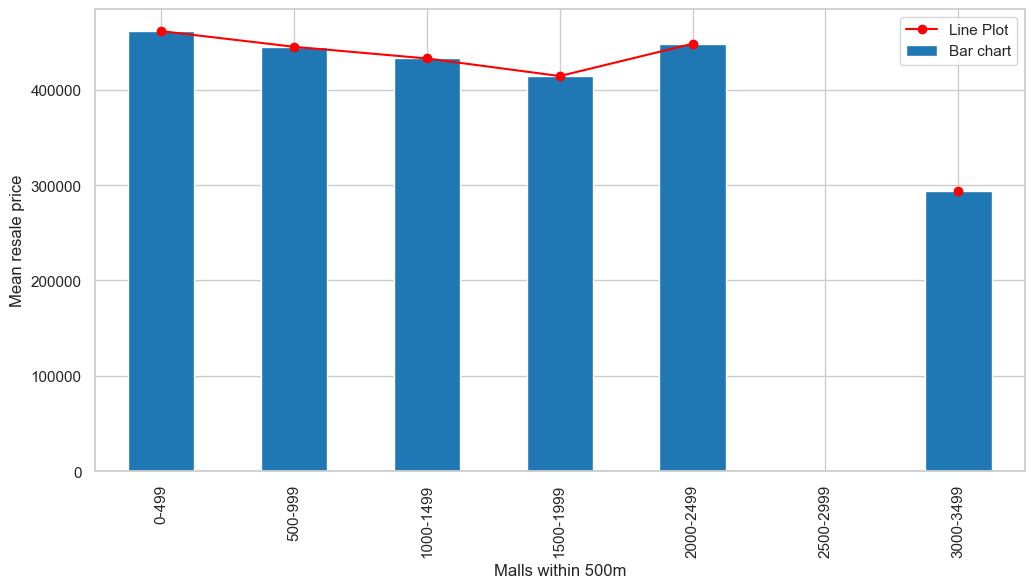

In [233]:
# Find out if flats that have malls within 500m are more expensive
# Group the DataFrame by 'Mall_Within_500m' and calculate the mean 'resale_price' within each group
malls_mean = price.groupby('distance_buckets_mall')['resale_price'].mean()

# Print the results
# print(price_per_sqft_by_age)

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the bar chart 
malls_mean.plot(kind='bar',  color='#1f77b4', label='Bar chart' )

# Create a line plot with markers
x = np.arange(len(malls_mean))  # Create x values for the line plot
y = malls_mean.values           # Get the values for the bar chart

# Plot the line connecting data points
plt.plot(x, y, marker='o', linestyle='-', color='red', label='Line Plot')

# Add the x and y axis labels
plt.xlabel('Malls within 500m')
plt.ylabel('Mean resale price')
plt.legend()

# Show plot
plt.show()

The more malls there are within 500m, the more expensive a flat will be.

## Are flats with more hawkers nearby more expensive? 

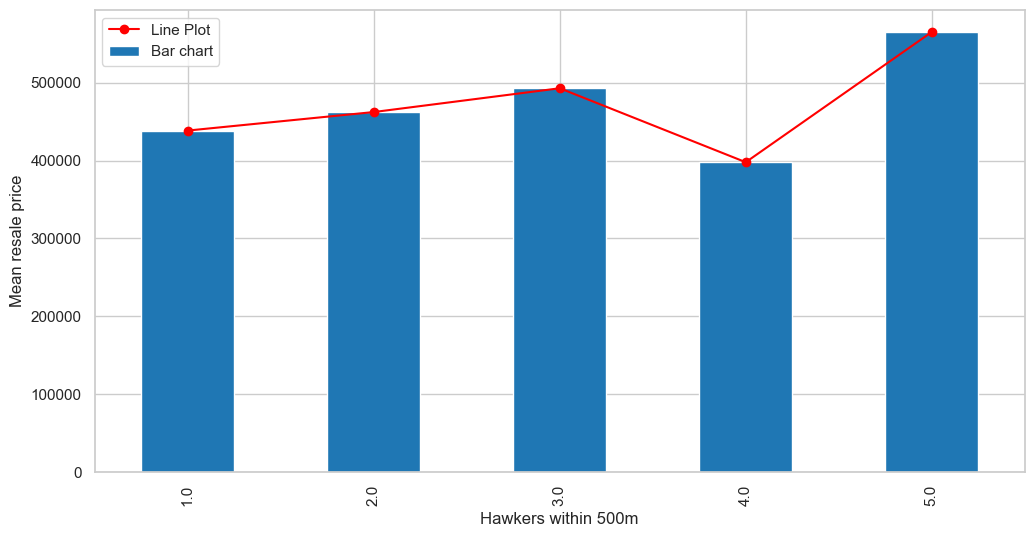

In [198]:
# Find out if flats that have hawkers within 500m are more expensive
# Group the DataFrame by 'Hawker_Within_500m' and calculate the mean 'resale_price' within each group
hawkers_mean = price.groupby('Hawker_Within_500m')['resale_price'].mean()

# Print the results
# print(hawkers_mean)

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the bar chart 
hawkers_mean.plot(kind='bar',  color='#1f77b4', label='Bar chart' )

# Create a line plot with markers
x = np.arange(len(hawkers_mean))  # Create x values for the line plot
y = hawkers_mean.values           # Get the values for the bar chart

# Plot the line connecting data points
plt.plot(x, y, marker='o', linestyle='-', color='red', label='Line Plot')

# Add the x and y axis labels
plt.xlabel('Hawkers within 500m')
plt.ylabel('Mean resale price')
plt.legend()

# Show plot
plt.show()

Flats with 5 hawker centres within 500m are the most expensive on average.

## Are flats with nearby mrts more expensive?

In [213]:
# First we change the mrt_nearest_distance to buckets of 500
# Convert the maximum distance to an integer
max_distance = int(max(price['mrt_nearest_distance']))

# Define the bin edges
bin_edges = list(range(0, max_distance + 500, 500))

# Create labels for the bins (optional)
bin_labels = [f"{i}-{i+499}" for i in bin_edges[:-1]]

# Use pd.cut() to create buckets
price['distance_buckets_mrt'] = pd.cut(price['mrt_nearest_distance'], bins=bin_edges, labels=bin_labels, right=False)

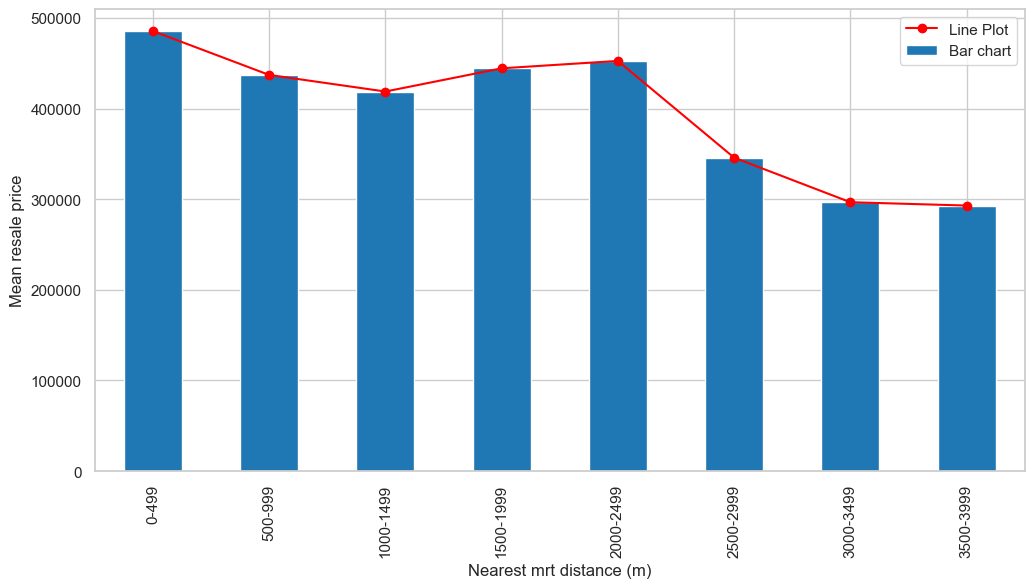

In [222]:
# Find out if flats that have mrts nearby are more expensive
# Group the DataFrame by 'mrt_nearest_distance' and calculate the mean 'resale_price' within each group
mrts_mean = price.groupby('distance_buckets_mrt')['resale_price'].mean()

# Print the results
# print(mrts_mean)

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the bar chart 
mrts_mean.plot(kind='bar',  color='#1f77b4', label='Bar chart' )

# Create a line plot with markers
x = np.arange(len(mrts_mean))  # Create x values for the line plot
y = mrts_mean.values           # Get the values for the bar chart

# Plot the line connecting data points
plt.plot(x, y, marker='o', linestyle='-', color='red', label='Line Plot')

# Add the x and y axis labels
plt.xlabel('Nearest mrt distance (m)')
plt.ylabel('Mean resale price')
plt.legend()

# Show plot
plt.show()

Flats with an mrt within 500m are the most expensive on average. Flats with an mrt within 3.5km to 4km are the cheapest on average. 

## Are flats with nearby bus stops more expensive?

In [218]:
# First we change the bus_stop_nearest_distance to buckets of 50
# Convert the maximum distance to an integer
max_distance = int(max(price['bus_stop_nearest_distance']))

# Define the bin edges
bin_edges = list(range(0, max_distance + 50, 50))

# Create labels for the bins (optional)
bin_labels = [f"{i}-{i+49}" for i in bin_edges[:-1]]

# Use pd.cut() to create buckets
price['distance_buckets_bus'] = pd.cut(price['mrt_nearest_distance'], bins=bin_edges, labels=bin_labels, right=False)

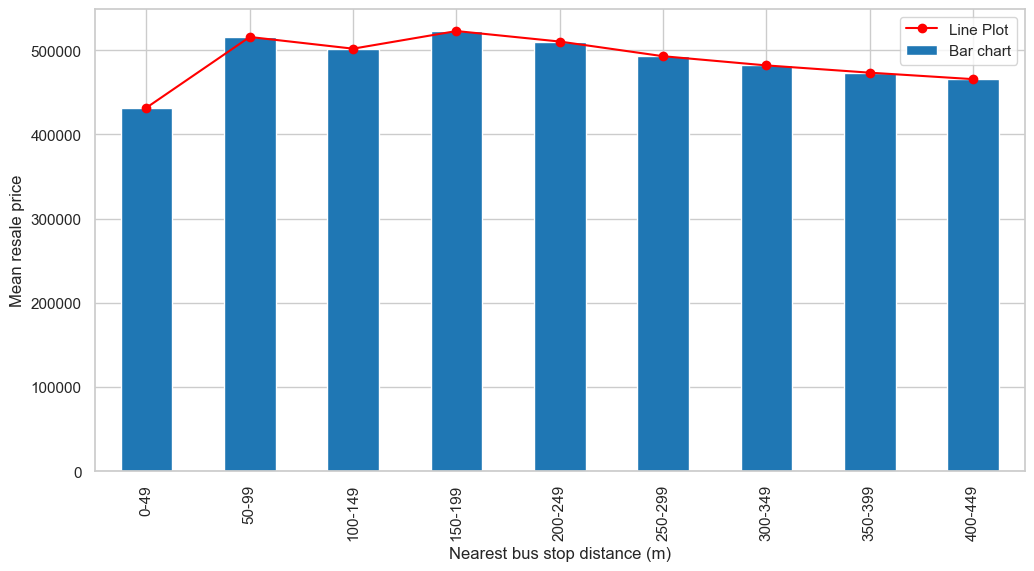

In [221]:
# Find out if flats that have mrts nearby are more expensive
# Group the DataFrame by 'mrt_nearest_distance' and calculate the mean 'resale_price' within each group
bus_mean = price.groupby('distance_buckets_bus')['resale_price'].mean()

# Print the results
# print(mrts_mean)

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the bar chart 
bus_mean.plot(kind='bar',  color='#1f77b4', label='Bar chart' )

# Create a line plot with markers
x = np.arange(len(bus_mean))  # Create x values for the line plot
y = bus_mean.values           # Get the values for the bar chart

# Plot the line connecting data points
plt.plot(x, y, marker='o', linestyle='-', color='red', label='Line Plot')

# Add the x and y axis labels
plt.xlabel('Nearest bus stop distance (m)')
plt.ylabel('Mean resale price')
plt.legend()

# Show plot
plt.show()

Flats with a bus stop within 150m to 200m are the most expensive on average. Flats with a bus stop within 0m to 50m are the cheapest on average.

## Are flats with nearby primary schools more expensive?

In [223]:
# First we change the pri_sch_nearest_distance to buckets of 500
# Convert the maximum distance to an integer
max_distance = int(max(price['pri_sch_nearest_distance']))

# Define the bin edges
bin_edges = list(range(0, max_distance + 500, 500))

# Create labels for the bins (optional)
bin_labels = [f"{i}-{i+499}" for i in bin_edges[:-1]]

# Use pd.cut() to create buckets
price['distance_buckets_pri'] = pd.cut(price['pri_sch_nearest_distance'], bins=bin_edges, labels=bin_labels, right=False)

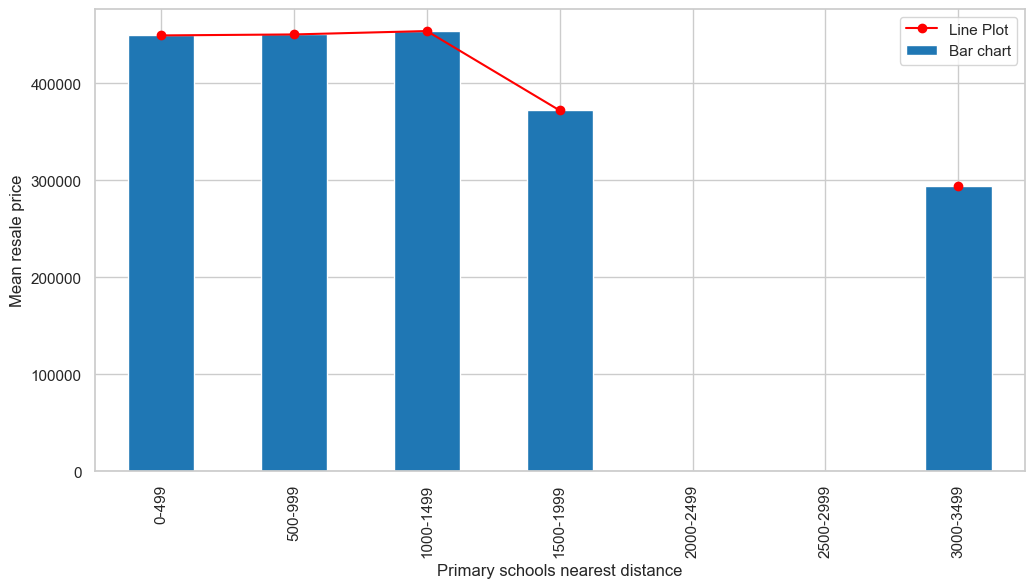

In [224]:
# Find out if flats that have mrts nearby are more expensive
# Group the DataFrame by 'mrt_nearest_distance' and calculate the mean 'resale_price' within each group
pri_mean = price.groupby('distance_buckets_pri')['resale_price'].mean()

# Print the results
# print(pri_mean)

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the bar chart 
pri_mean.plot(kind='bar',  color='#1f77b4', label='Bar chart' )

# Create a line plot with markers
x = np.arange(len(pri_mean))  # Create x values for the line plot
y = pri_mean.values           # Get the values for the bar chart

# Plot the line connecting data points
plt.plot(x, y, marker='o', linestyle='-', color='red', label='Line Plot')

# Add the x and y axis labels
plt.xlabel('Primary schools nearest distance')
plt.ylabel('Mean resale price')
plt.legend()

# Show plot
plt.show()

Flats with a primary school within 0m to 1500m are the most expensive on average. Flats with a primary school within 3000m to 3500m are the cheapest on average.

## Are flats with nearby secondary schools more expensive?

In [226]:
# First we change the sec_sch_nearest_dist to buckets of 500
# Convert the maximum distance to an integer
max_distance = int(max(price['sec_sch_nearest_dist']))

# Define the bin edges
bin_edges = list(range(0, max_distance + 500, 500))

# Create labels for the bins (optional)
bin_labels = [f"{i}-{i+499}" for i in bin_edges[:-1]]

# Use pd.cut() to create buckets
price['distance_buckets_sec'] = pd.cut(price['sec_sch_nearest_dist'], bins=bin_edges, labels=bin_labels, right=False)

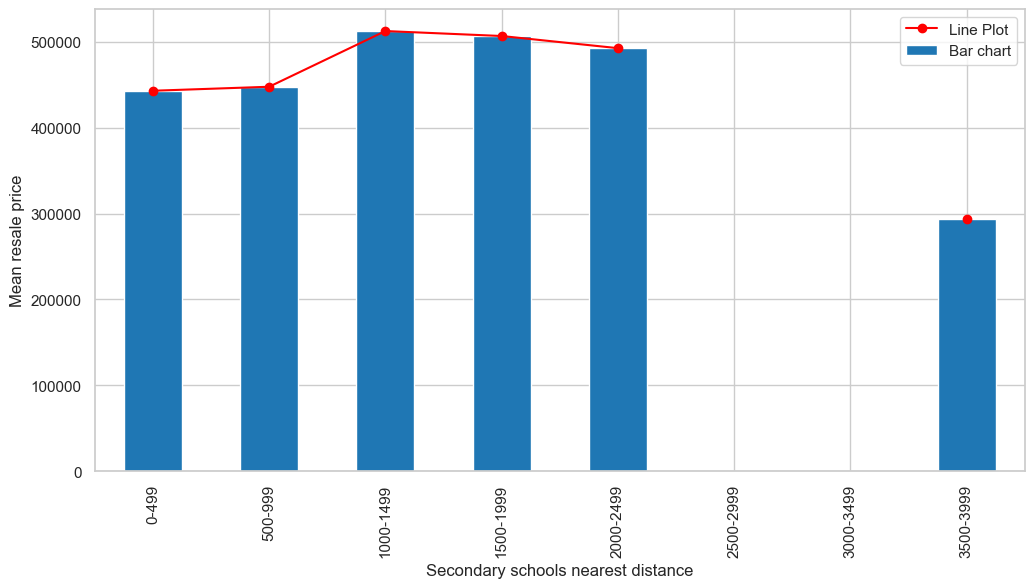

In [228]:
# Find out if flats that have mrts nearby are more expensive
# Group the DataFrame by 'mrt_nearest_distance' and calculate the mean 'resale_price' within each group
sec_mean = price.groupby('distance_buckets_sec')['resale_price'].mean()

# Print the results
# print(sec_mean)

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the bar chart 
sec_mean.plot(kind='bar',  color='#1f77b4', label='Bar chart' )

# Create a line plot with markers
x = np.arange(len(sec_mean))  # Create x values for the line plot
y = sec_mean.values           # Get the values for the bar chart

# Plot the line connecting data points
plt.plot(x, y, marker='o', linestyle='-', color='red', label='Line Plot')

# Add the x and y axis labels
plt.xlabel('Secondary schools nearest distance')
plt.ylabel('Mean resale price')
plt.legend()

# Show plot
plt.show()

Flats with a secondary school within 1000m to 1500m are the most expensive on average. Flats with a primary school within 3500m to 4000m are the cheapest on average.

## Which area is the most expensive? (Map)

Why are these places more expensive? Why are other places cheaper? 

In [22]:
# Change the previous list to a dataframe
towns = pd.DataFrame(mean_resale_prices_by_town)
towns.keys()

Index(['resale_price'], dtype='object')

In [27]:
# Group the DataFrame by 'town' and calculate the mean 'Latitude' and 'Longitude'
lat = price.groupby('town')['Latitude'].mean()
long = price.groupby('town')['Longitude'].mean()

# Create DataFrames for latitude and longitude
lat_df = pd.DataFrame(lat)
long_df = pd.DataFrame(long)
print(lat_df)

                 Latitude
town                     
ANG MO KIO       1.370769
BEDOK            1.329569
BISHAN           1.353006
BUKIT BATOK      1.353416
BUKIT MERAH      1.281290
BUKIT PANJANG    1.382842
BUKIT TIMAH      1.331656
CENTRAL AREA     1.289337
CHOA CHU KANG    1.387955
CLEMENTI         1.312812
GEYLANG          1.321678
HOUGANG          1.370510
JURONG EAST      1.337303
JURONG WEST      1.343757
KALLANG/WHAMPOA  1.319673
MARINE PARADE    1.303939
PASIR RIS        1.372210
PUNGGOL          1.400622
QUEENSTOWN       1.301945
SEMBAWANG        1.450969
SENGKANG         1.390199
SERANGOON        1.360952
TAMPINES         1.352938
TOA PAYOH        1.336329
WOODLANDS        1.438267
YISHUN           1.427300


In [36]:
# Concatenate the DataFrames horizontally
result_df = pd.concat([towns, lat_df, long_df], axis=1)

# Rename columns
result_df.rename(columns={'Latitude': 'latitude','Longitude': 'longitude'}, inplace=True)
print(result_df)

                  resale_price  latitude   longitude
town                                                
ANG MO KIO       414215.073827  1.370769  103.847459
BEDOK            419066.233031  1.329569  103.928032
BISHAN           618369.865510  1.353006  103.846067
BUKIT BATOK      397435.616708  1.353416  103.750473
BUKIT MERAH      555343.708384  1.281290  103.822024
BUKIT PANJANG    436084.447042  1.382842  103.767500
BUKIT TIMAH      704416.883469  1.331656  103.786017
CENTRAL AREA     604929.860689  1.289337  103.846498
CHOA CHU KANG    413041.806363  1.387955  103.745913
CLEMENTI         466308.240573  1.312812  103.765934
GEYLANG          429782.144506  1.321678  103.891238
HOUGANG          441792.373347  1.370510  103.888309
JURONG EAST      425715.546233  1.337303  103.739448
JURONG WEST      412280.968017  1.343757  103.707251
KALLANG/WHAMPOA  489461.074783  1.319673  103.860281
MARINE PARADE    528395.655892  1.303939  103.912533
PASIR RIS        501179.530758  1.372210  103.

In [37]:
# Initialize a list to store coordinates
coords = []

# Iterate through rows of the DataFrame
for index, row in result_df.iterrows():
    # Extract latitude and longitude values from the row
    latitude = row['latitude']
    longitude = row['longitude']
    
    # Create a coordinate tuple (latitude, longitude)
    coordinate = (latitude, longitude)
    
    # Append the coordinate to the list
    coords.append(coordinate)

# Create a new 'coordinates' column in the DataFrame
result_df['coordinates'] = coords

# Display the first 5 rows of the updated DataFrame
result_df.head(5)

,resale_price,latitude,longitude,coordinates
town,,,,
ANG MO KIO,414215.073827,1.370769,103.847459,"(1.3707688846494699, 103.84745860138338)"
BEDOK,419066.233031,1.329569,103.928032,"(1.3295694670268978, 103.9280315178307)"
BISHAN,618369.865510,1.353006,103.846067,"(1.3530061684378265, 103.84606688042494)"
BUKIT BATOK,397435.616708,1.353416,103.750473,"(1.35341556629984, 103.75047316210208)"
BUKIT MERAH,555343.708384,1.281290,103.822024,"(1.2812903381969445, 103.82202406468191)"


In [50]:
# converting df to geodf
geodf = gpd.GeoDataFrame(data = result_df, geometry = gpd.points_from_xy(result_df.longitude,result_df.latitude))

# Reset the index and set a name for the first column
geodf = geodf.reset_index('town')
geodf

,town,resale_price,latitude,longitude,coordinates,geometry
0,ANG MO KIO,414215.073827,1.370769,103.847459,"(1.3707688846494699, 103.84745860138338)",POINT (103.84746 1.37077)
1,BEDOK,419066.233031,1.329569,103.928032,"(1.3295694670268978, 103.9280315178307)",POINT (103.92803 1.32957)
2,BISHAN,618369.865510,1.353006,103.846067,"(1.3530061684378265, 103.84606688042494)",POINT (103.84607 1.35301)
3,BUKIT BATOK,397435.616708,1.353416,103.750473,"(1.35341556629984, 103.75047316210208)",POINT (103.75047 1.35342)
4,BUKIT MERAH,555343.708384,1.281290,103.822024,"(1.2812903381969445, 103.82202406468191)",POINT (103.82202 1.28129)
5,BUKIT PANJANG,436084.447042,1.382842,103.767500,"(1.3828423709524973, 103.76750023240056)",POINT (103.76750 1.38284)
6,BUKIT TIMAH,704416.883469,1.331656,103.786017,"(1.331656246102981, 103.78601727615177)",POINT (103.78602 1.33166)
7,CENTRAL AREA,604929.860689,1.289337,103.846498,"(1.2893371610736588, 103.84649780048039)",POINT (103.84650 1.28934)
8,CHOA CHU KANG,413041.806363,1.387955,103.745913,"(1.3879549991669484, 103.74591252061012)",POINT (103.74591 1.38795)
9,CLEMENTI,466308.240573,1.312812,103.765934,"(1.3128121384537568, 103.76593369465998)",POINT (103.76593 1.31281)


In [66]:
# Load Singapore GeoJSON data
# Replace 'path_to_geojson_file.geojson' with the actual path to your GeoJSON file
geojson_path = '../Datasets/planning-boundary-area.geojson'
gdf = gpd.read_file(geojson_path)

# Set the maximum number of columns to display
pd.set_option('display.max_columns', None)
gdf

,Name,PLN_AREA_N,PLN_AREA_C,CA_IND,REGION_N,REGION_C,INC_CRC,FMEL_UPD_D,geometry
0,kml_1,BUKIT MERAH,BM,False,CENTRAL REGION,CR,5321BA51A092CCC2,20191206144714,"POLYGON ((103.81740 1.29433, 103.81787 1.29393..."
1,kml_2,BUKIT PANJANG,BP,False,WEST REGION,WR,6C222E4C54F9F0F7,20191206144714,"POLYGON ((103.77445 1.39029, 103.77499 1.38607..."
2,kml_3,BUKIT TIMAH,BT,False,CENTRAL REGION,CR,6CCDADD1F85173E9,20191206144714,"POLYGON ((103.79766 1.34813, 103.79806 1.34779..."
3,kml_4,CENTRAL WATER CATCHMENT,CC,False,NORTH REGION,NR,9F30125764C74984,20191206144714,"POLYGON ((103.80578 1.41436, 103.80594 1.41403..."
4,kml_5,CHANGI,CH,False,EAST REGION,ER,6F32A6036888B139,20191206144714,"POLYGON ((103.98693 1.39794, 103.98765 1.39783..."
5,kml_6,CHOA CHU KANG,CK,False,WEST REGION,WR,5224CD5C7960361F,20191206144714,"POLYGON ((103.74660 1.40541, 103.74691 1.40540..."
6,kml_7,CLEMENTI,CL,False,WEST REGION,WR,1B547582113C390E,20191206144714,"POLYGON ((103.76707 1.33120, 103.76708 1.33119..."
7,kml_8,HOUGANG,HG,False,NORTH-EAST REGION,NER,6B18B43959CDE4EB,20191206144714,"POLYGON ((103.88152 1.38774, 103.88269 1.38698..."
8,kml_9,JURONG EAST,JE,False,WEST REGION,WR,97CD8E4DB8DA2A0D,20191206144714,"POLYGON ((103.74350 1.34451, 103.74401 1.34430..."
9,kml_10,JURONG WEST,JW,False,WEST REGION,WR,15407CC4B888BDB5,20191206144714,"POLYGON ((103.72813 1.34888, 103.72816 1.34436..."


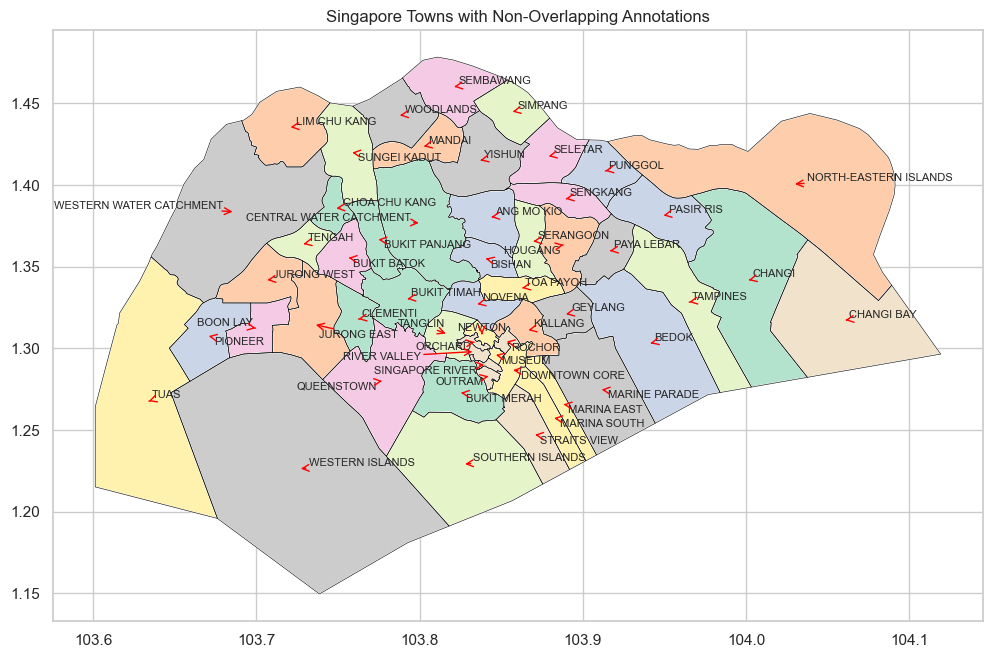

In [98]:
# Preview of the map
# gdf.boundary.plot()
# Create a Matplotlib figure and axis
fig, ax = plt.subplots(1, figsize=(12, 12))

# Plot the Singapore boundary map
gdf.boundary.plot(ax=ax, color='black', linewidth=0.4)

# Plot the town polygons with a colormap
gdf.plot(ax=ax, cmap='Pastel2')

# Annotate town names at the centroids of polygons
texts = []
for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['PLN_AREA_N']):
    texts.append(plt.text(x, y, label, fontsize=8, ha='center'))

# Adjust the position of labels to minimize overlap
adjust_text(texts, expand_text=(1.01, 1.01), expand_points=(1.2, 1.2), arrowprops=dict(arrowstyle='->', color='red'))

# Set the title
ax.set_title('Singapore Towns with Non-Overlapping Annotations')

# Show the map
plt.show()

      Name               PLN_AREA_N PLN_AREA_C CA_IND           REGION_N  \
0    kml_1              BUKIT MERAH         BM  False     CENTRAL REGION   
1    kml_2            BUKIT PANJANG         BP  False        WEST REGION   
2    kml_3              BUKIT TIMAH         BT  False     CENTRAL REGION   
3    kml_4  CENTRAL WATER CATCHMENT         CC  False       NORTH REGION   
4    kml_5                   CHANGI         CH  False        EAST REGION   
5    kml_6            CHOA CHU KANG         CK  False        WEST REGION   
6    kml_7                 CLEMENTI         CL  False        WEST REGION   
7    kml_8                  HOUGANG         HG  False  NORTH-EAST REGION   
8    kml_9              JURONG EAST         JE  False        WEST REGION   
9   kml_10              JURONG WEST         JW  False        WEST REGION   
10  kml_11                  KALLANG         KL  False     CENTRAL REGION   
11  kml_12             LIM CHU KANG         LK  False       NORTH REGION   
12  kml_13  

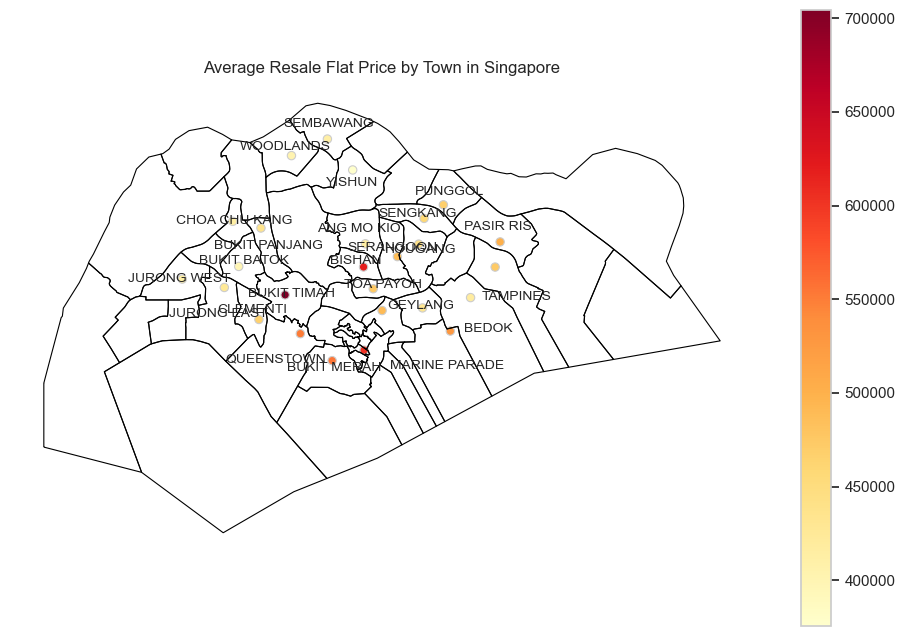

In [182]:
# Merge the GeoDataFrame with the average price data
merged = gdf.merge(geodf, left_on='geometry', right_on='geometry', how='outer')
print(merged)

# Plot the choropleth map
fig, ax = plt.subplots(1, figsize=(12, 8))
sns.set(style='whitegrid')
sns.set_palette('YlOrRd')  # You can choose a different color palette

# This plots the Singapore boundary map
gdf.boundary.plot(ax=ax, color='black', linewidth=.8)

# Filter the GeoDataFrame to include only towns with data
gdf_filtered = gdf[gdf['PLN_AREA_N'].isin(geodf['town'])]

# Annotate town names at the centroids of polygons for filtered towns
texts = []
for x, y, label in zip(gdf_filtered.geometry.centroid.x, gdf_filtered.geometry.centroid.y, gdf_filtered['PLN_AREA_N']):
    texts.append(plt.text(x, y, label, fontsize=10, ha='center'))

# Plot the polygons with a colormap using the 'resale_price' column
merged.plot(column='resale_price', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.axis('off')

# Set the title and legend labels
ax.set_title('Average Resale Flat Price by Town in Singapore')
#ax.legend(label='Average Price', loc='lower right')

# Show the map
plt.show()